In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
df = pd.read_csv(r'E:\ML Dataset\LP-1 Dataset\K-Means & Hirarchical Clustering\cities_r2.csv')
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [3]:
print(df.columns)
print(df.dtypes)

Index(['name_of_city', 'state_code', 'state_name', 'dist_code',
       'population_total', 'population_male', 'population_female',
       '0-6_population_total', '0-6_population_male', '0-6_population_female',
       'literates_total', 'literates_male', 'literates_female', 'sex_ratio',
       'child_sex_ratio', 'effective_literacy_rate_total',
       'effective_literacy_rate_male', 'effective_literacy_rate_female',
       'location', 'total_graduates', 'male_graduates', 'female_graduates'],
      dtype='object')
name_of_city                       object
state_code                          int64
state_name                         object
dist_code                           int64
population_total                    int64
population_male                     int64
population_female                   int64
0-6_population_total                int64
0-6_population_male                 int64
0-6_population_female               int64
literates_total                     int64
literates_male      

In [5]:
# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
df['state_name'] = label_encoder.fit_transform(df['state_name'])
df['location'] = label_encoder.fit_transform(df['location'])

# Scaling the features using StandardScaler (for clustering algorithms)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['population_total', 'population_male', 'population_female',
                                      'literates_total', 'literates_male', 'literates_female',
                                      'effective_literacy_rate_total', 'sex_ratio', 'child_sex_ratio',
                                      'total_graduates', 'male_graduates', 'female_graduates']])

# Convert scaled data back to a DataFrame for ease of handling
scaled_df = pd.DataFrame(scaled_df, columns=['population_total', 'population_male', 'population_female',
                                             'literates_total', 'literates_male', 'literates_female',
                                             'effective_literacy_rate_total', 'sex_ratio', 'child_sex_ratio',
                                             'total_graduates', 'male_graduates', 'female_graduates'])


In [6]:
# Apply AgglomerativeClustering on the scaled data (focusing on 'effective_literacy_rate_total')
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

# Fit the model and assign cluster labels
df['Cluster'] = hc.fit_predict(scaled_df[['effective_literacy_rate_total']])

# Check the first few rows with the assigned cluster labels
print(df.head())


  name_of_city  state_code  state_name  dist_code  population_total  \
0      Abohar            3          22          9            145238   
1    Achalpur           27          14          7            112293   
2    Adilabad           28           1          1            117388   
3   Adityapur           20          10         24            173988   
4       Adoni           28           1         21            166537   

   population_male  population_female  0-6_population_total  \
0            76840              68398                 15870   
1            58256              54037                 11810   
2            59232              58156                 13103   
3            91495              82493                 23042   
4            82743              83794                 18406   

   0-6_population_male  0-6_population_female  ...  sex_ratio  \
0                 8587                   7283  ...        890   
1                 6186                   5624  ...        928   

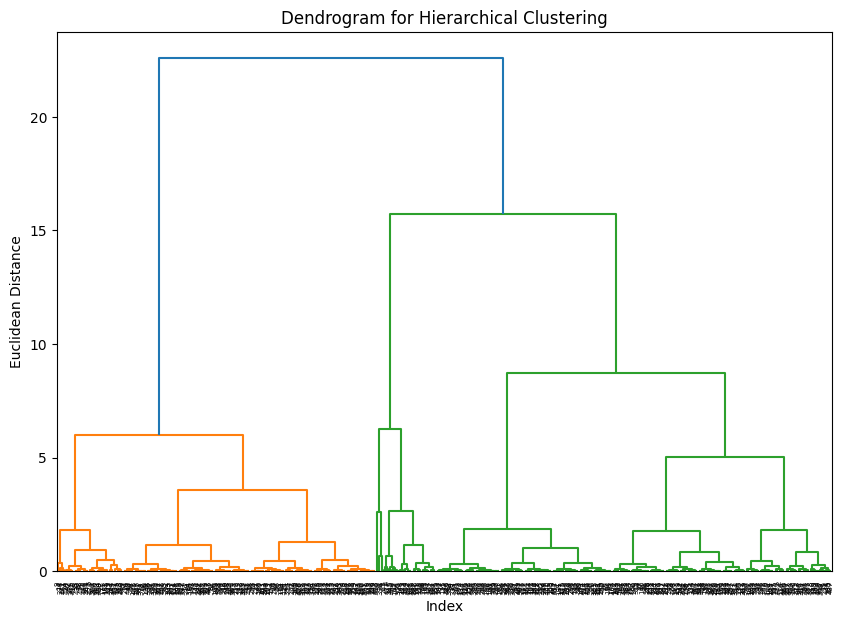

In [7]:
# Generate the linkage matrix
linked = linkage(scaled_df[['effective_literacy_rate_total']], method='ward')

# Create the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Index')
plt.ylabel('Euclidean Distance')
plt.show()


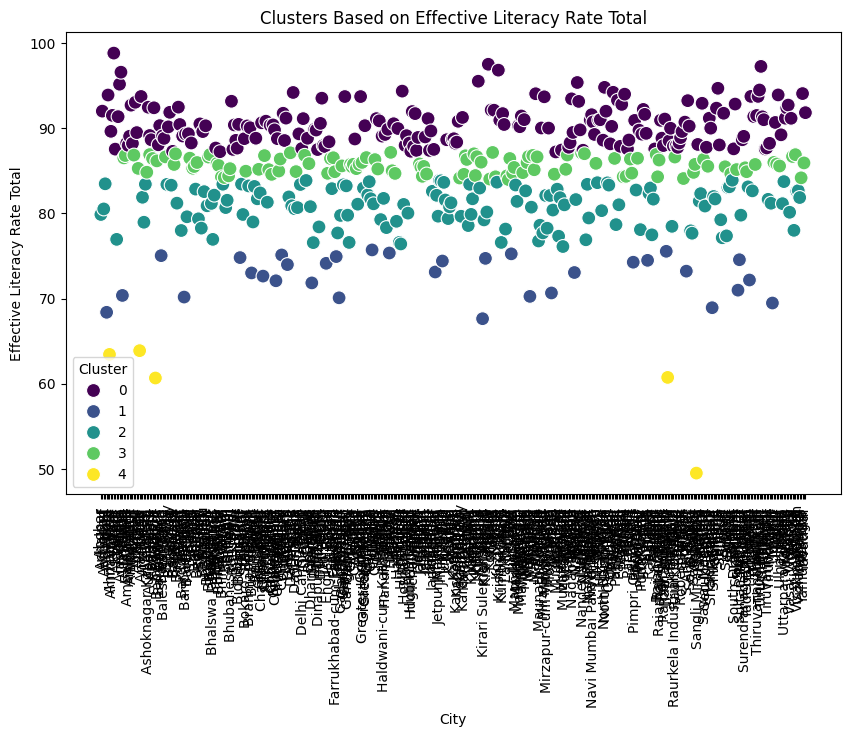

In [8]:
# Plot the clusters based on effective_literacy_rate_total
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['name_of_city'], y=df['effective_literacy_rate_total'], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Clusters Based on Effective Literacy Rate Total')
plt.xlabel('City')
plt.ylabel('Effective Literacy Rate Total')
plt.xticks(rotation=90)
plt.show()
